In [424]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Iris Datasets

### Import dataset

In [425]:
df = pd.read_csv('iris.data', names=['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Flower'])
df.Flower = df.Flower.astype("category")

In [426]:
df.head()

,Sepal_length,Sepal_width,Petal_length,Petal_width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Statistics

In [427]:
df.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [428]:
df.groupby('Flower').size()

Flower
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Plots

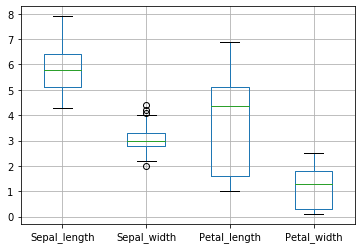

In [429]:
df.boxplot(column=['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width'])

In [430]:
colors = ['red','blue','green']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2edeb965f8>,
      dtype=object)

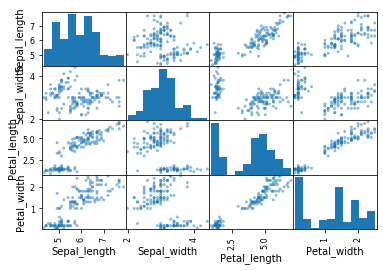

In [431]:
scatter_matrix(df)

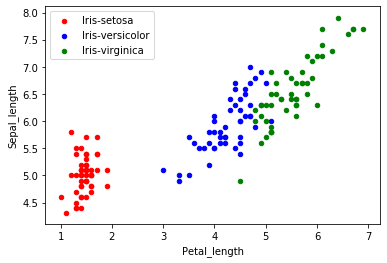

In [432]:
fig, ax = plt.subplots()

flower_types = df.Flower.unique()
for i, flower_type in enumerate(flower_types):
    df_flower = df[df.Flower == flower_type]
    df_flower.plot.scatter('Petal_length', 'Sepal_length', ax=ax, c=colors[i])
ax.legend(flower_types)

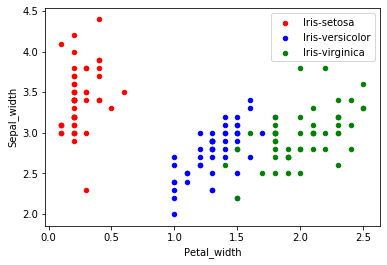

In [433]:
fig, ax = plt.subplots()

flower_types = df.Flower.unique()
for i, flower_type in enumerate(flower_types):
    df_flower = df[df.Flower == flower_type]
    df_flower.plot.scatter('Petal_width', 'Sepal_width', ax=ax, c=colors[i])
ax.legend(flower_types)

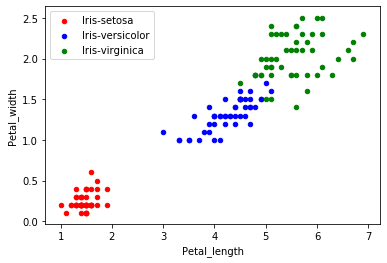

In [434]:
fig, ax = plt.subplots()

flower_types = df.Flower.unique()
for i, flower_type in enumerate(flower_types):
    df_flower = df[df.Flower == flower_type]
    df_flower.plot.scatter('Petal_length', 'Petal_width', ax=ax, c=colors[i])
ax.legend(flower_types)

## Preprocessing

In [435]:
df_x = df.drop(columns='Flower')
df_y = df['Flower'].cat.codes

In [436]:
#df_x = preprocessing.scale(df_x)

## Classification

Store a part of the data for a final evaluation of the best performing model

In [437]:
validation_size=0.2
X_train, X_validation, Y_train, Y_validation = train_test_split(df_x, df_y, test_size=validation_size, random_state=7)

Prepare the CV strategy and the model to evaluate

In [438]:
kfold = KFold(10)
models = []
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))

Evaluate the models

In [439]:
results = []
for model in models:
    scores = cross_val_score(model[1], X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append((model[0], scores))
results

[('CART', array([1.        , 1.        , 1.        , 0.91666667, 1.        ,
         1.        , 0.91666667, 1.        , 0.91666667, 1.        ])),
 ('KNN', array([1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 0.91666667, 1.        , 1.        , 0.91666667])),
 ('SVM', array([1.        , 1.        , 1.        , 1.        , 1.        ,
         1.        , 0.91666667, 1.        , 1.        , 1.        ]))]

Plot the scores

In [440]:
df_results = pd.DataFrame()
cols = []
for result in results:
    cols.append(result[0])
    df_results[result[0]] = result[1]
df_results.describe()

,CART,KNN,SVM
count,10.000000,10.000000,10.000000
mean,0.975000,0.983333,0.991667
std,0.040254,0.035136,0.026352
min,0.916667,0.916667,0.916667
25%,0.937500,1.000000,1.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


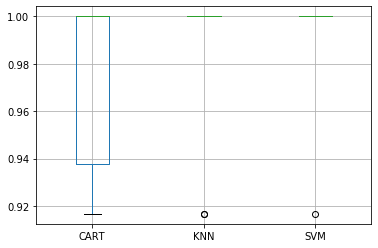

In [441]:
df_results.boxplot(column=cols)

## Final Evaluation

Evaluate the best performing model on the validation set

In [442]:
model = SVC(gamma='auto')

In [443]:
model.fit(X_train, Y_train)
Y_predict = model.predict(X_validation)
print(accuracy_score(Y_validation, Y_predict))
print(confusion_matrix(Y_validation, Y_predict))
print(classification_report(Y_validation, Y_predict))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.83      0.91        12
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

